<a href="https://colab.research.google.com/github/wtfoong/ODL_assignment/blob/main/ODL_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install new ver of panda profilling
!pip install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 12.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=c2ab979204dfef06c280a6b32aa99964f1b978e14eec44d56b80c4a009fa5271
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Unin

In [ ]:
#imports
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import math
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#### Dataset Exploration and preprocessing

In [ ]:
#Mounting Google Drive to google Colab
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
#connecting dataset
path = '/drive/MyDrive/ODL assignment/diabetes_binary_health_indicators_BRFSS2015.csv' 
df = pd.read_csv(path)

In [ ]:
#read first 5 row of data
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [ ]:
#read last 5 rows 
df.tail()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[5 rows x 22 columns]

In [ ]:
#see all columns
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
#see dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
#know number of rows and columns
df.shape

(253680, 22)

In [ ]:
#get mean and other stuff of all columns
df.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [ ]:
#get a detailed report for all columsn in the dataset
pReport = ProfileReport(df)
pReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#check for missing data
df.isnull().sum().any()

False

In [ ]:
# view unique values in all columns
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()


unique value count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

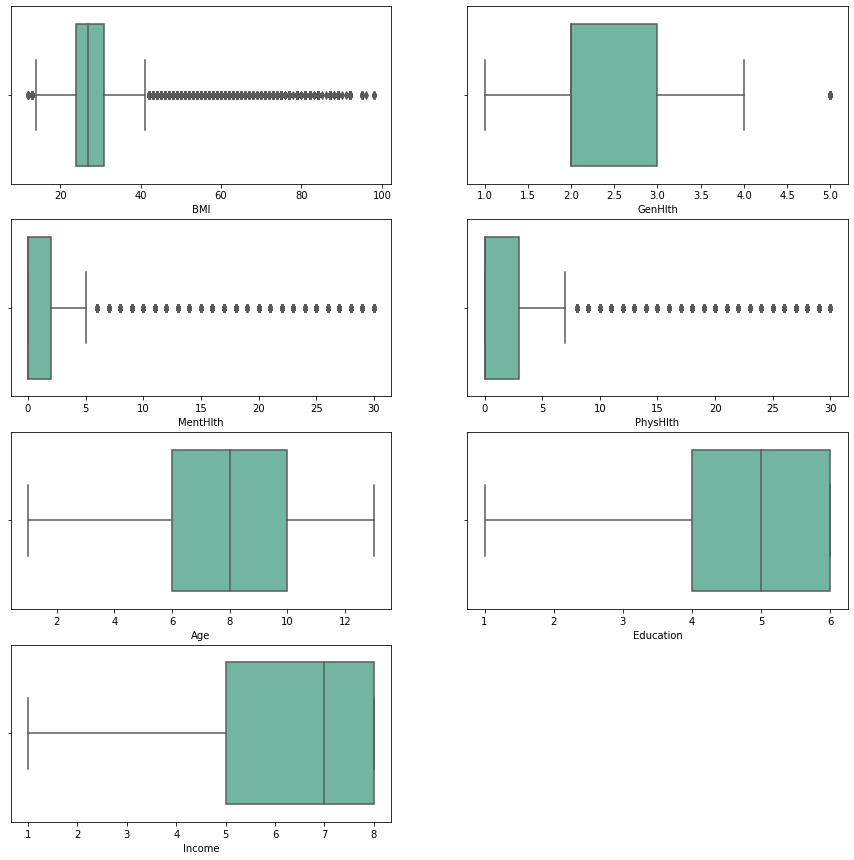

In [ ]:
# chk for outliers in dataset using box plot, columns chosen to check are columns with more than 2 unique values
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df ,palette='Set2')
plt.show()

In [ ]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic in a new Diabetes_str column
df["Diabetes_str"]= df["Diabetes_binary"].replace({'0':"Not Diabetic",'1':"Diabetic"})

In [ ]:
# to show categorical values better
df2 = df.copy() 

In [ ]:
# help to show relations between the different features better, all explaination for columns are from author of dataset
df2.Age[df2['Age'] == 1] = '18 - 24'
df2.Age[df2['Age'] == 2] = '25 - 29'
df2.Age[df2['Age'] == 3] = '30 - 34'
df2.Age[df2['Age'] == 4] = '35 - 39'
df2.Age[df2['Age'] == 5] = '40 - 44'
df2.Age[df2['Age'] == 6] = '45 - 49'
df2.Age[df2['Age'] == 7] = '50 - 54'
df2.Age[df2['Age'] == 8] = '55 - 59'
df2.Age[df2['Age'] == 9] = '60 - 64'
df2.Age[df2['Age'] == 10] = '65 - 69'
df2.Age[df2['Age'] == 11] = '70 - 74'
df2.Age[df2['Age'] == 12] = '75 - 79'
df2.Age[df2['Age'] == 13] = '80 or older'

df2.Diabetes_binary[df2['Diabetes_binary'] == 0] = 'Not Diabetic'
df2.Diabetes_binary[df2['Diabetes_binary'] == 1] = 'Diabetic'

df2.HighBP[df2['HighBP'] == 0] = 'Normal BP'
df2.HighBP[df2['HighBP'] == 1] = 'High BP'

df2.HighChol[df2['HighChol'] == 0] = 'Normal Cholesterol'
df2.HighChol[df2['HighChol'] == 1] = 'High Cholesterol'

df2.CholCheck[df2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df2.CholCheck[df2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df2.Smoker[df2['Smoker'] == 0] = 'No'
df2.Smoker[df2['Smoker'] == 1] = 'Yes'

df2.Stroke[df2['Stroke'] == 0] = 'No'
df2.Stroke[df2['Stroke'] == 1] = 'Yes'

df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 0] = 'No'
df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 1] = 'Yes'

df2.PhysActivity[df2['PhysActivity'] == 0] = 'No'
df2.PhysActivity[df2['PhysActivity'] == 1] = 'Yes'

df2.Fruits[df2['Fruits'] == 0] = 'No'
df2.Fruits[df2['Fruits'] == 1] = 'Yes'

df2.Veggies[df2['Veggies'] == 0] = 'No'
df2.Veggies[df2['Veggies'] == 1] = 'Yes'

df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 0] = 'No'
df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 1] = 'Yes'

df2.AnyHealthcare[df2['AnyHealthcare'] == 0] = 'No'
df2.AnyHealthcare[df2['AnyHealthcare'] == 1] = 'Yes'

df2.NoDocbcCost[df2['NoDocbcCost'] == 0] = 'No'
df2.NoDocbcCost[df2['NoDocbcCost'] == 1] = 'Yes'

df2.GenHlth[df2['GenHlth'] == 5] = 'Excellent'
df2.GenHlth[df2['GenHlth'] == 4] = 'Very Good'
df2.GenHlth[df2['GenHlth'] == 3] = 'Good'
df2.GenHlth[df2['GenHlth'] == 2] = 'Fair'
df2.GenHlth[df2['GenHlth'] == 1] = 'Poor'

df2.DiffWalk[df2['DiffWalk'] == 0] = 'No'
df2.DiffWalk[df2['DiffWalk'] == 1] = 'Yes'

df2.Sex[df2['Sex'] == 0] = 'Female'
df2.Sex[df2['Sex'] == 1] = 'Male'

df2.Education[df2['Education'] == 1] = 'Never Attended School'
df2.Education[df2['Education'] == 2] = 'Elementary'
df2.Education[df2['Education'] == 3] = 'Junior High School'
df2.Education[df2['Education'] == 4] = 'Senior High School'
df2.Education[df2['Education'] == 5] = 'Undergraduate Degree'
df2.Education[df2['Education'] == 6] = 'Magister'

df2.Income[df2['Income'] == 1] = 'Less Than $10,000'
df2.Income[df2['Income'] == 2] = 'Less Than $10,000'
df2.Income[df2['Income'] == 3] = 'Less Than $10,000'
df2.Income[df2['Income'] == 4] = 'Less Than $10,000'
df2.Income[df2['Income'] == 5] = 'Less Than $35,000'
df2.Income[df2['Income'] == 6] = 'Less Than $35,000'
df2.Income[df2['Income'] == 7] = 'Less Than $35,000'
df2.Income[df2['Income'] == 8] = '$75,000 or More'

<ipython-input-7-b6659e11ee60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Age[df2['Age'] == 2] = '25 - 29'
<ipython-input-7-b6659e11ee60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Age[df2['Age'] == 3] = '30 - 34'
<ipython-input-7-b6659e11ee60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Age[df2['Age'] == 4] = '35 - 39'
<ipython-input-7-b6659e11ee60>:6: SettingWithCopyWarning: 
A value is trying to be set o

Text(0.5, 1.0, 'correlation of features')

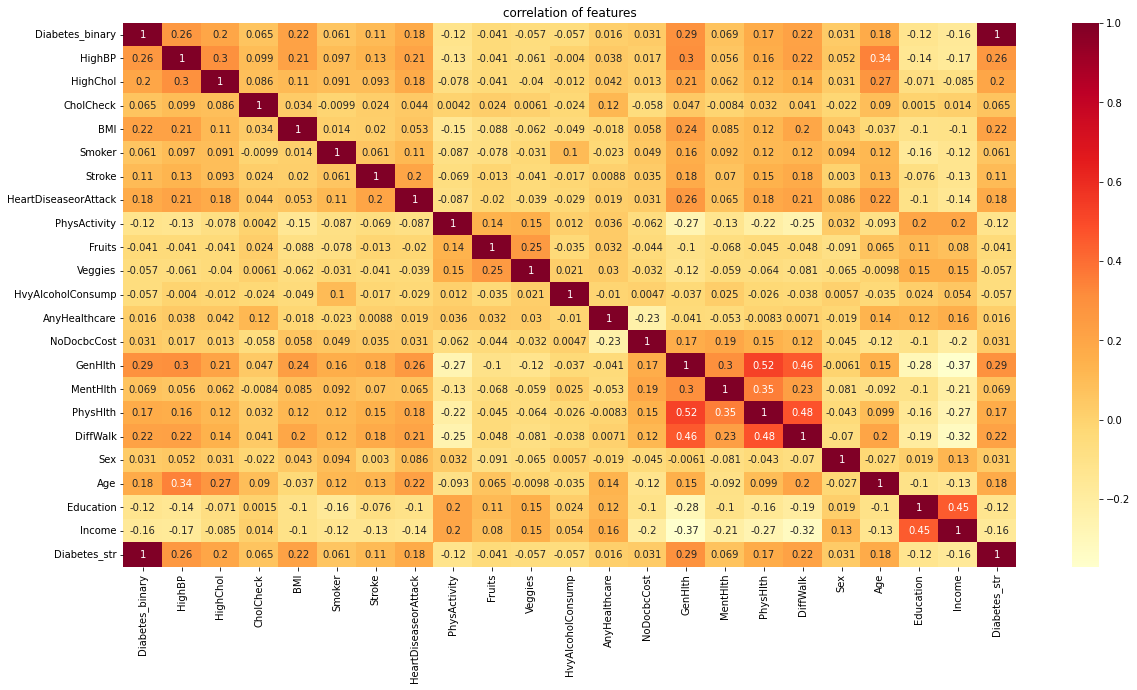

In [ ]:
#use heatmap to show correlation of features in the dataset
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of features")

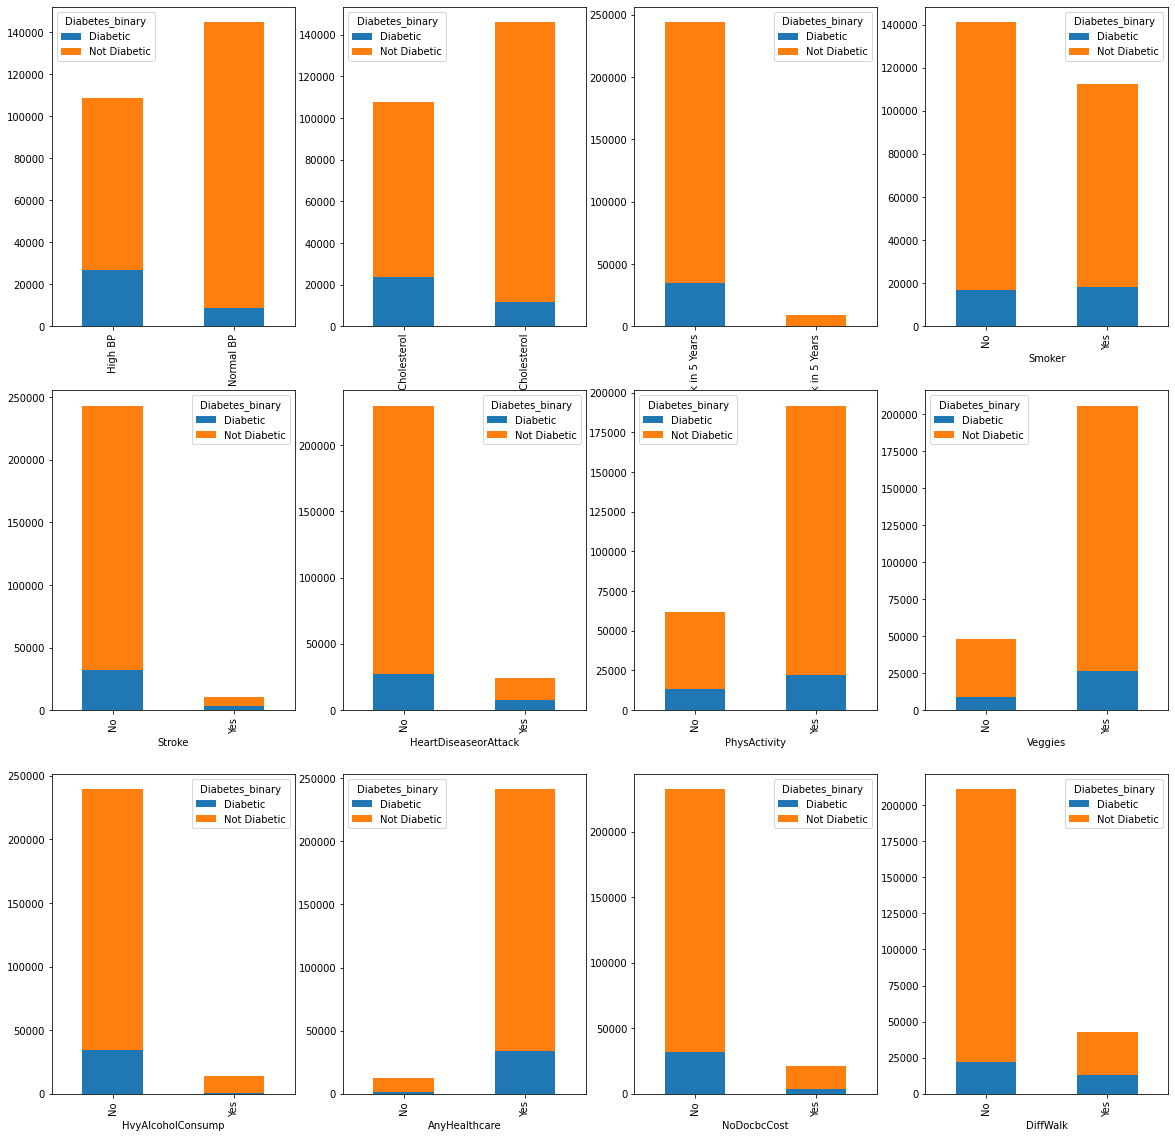

In [ ]:
# using bar graph to show the relation of the features with the Diabetic binary along with the feature's yes no columns
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

def create_pivot_plot(df2, x_column):
    # Create a pivot table for satisfaction versus another rating for easy plotting.
    p_plot = df2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return p_plot

fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_pivot_plot(df2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()



---



In [ ]:
#explore on Diabetes_binary column

df2["Diabetes_binary"].value_counts()

Not Diabetic    218334
Diabetic         35346
Name: Diabetes_binary, dtype: int64

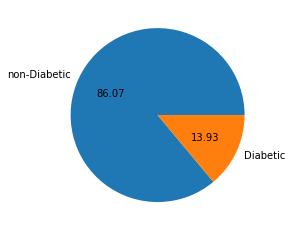

In [ ]:
#showing the numbers in a pie chart

labels=["non-Diabetic","Diabetic"]

plt.pie(df2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

The pie chart shows that there are more non diabetic people than diabetic patients.



---



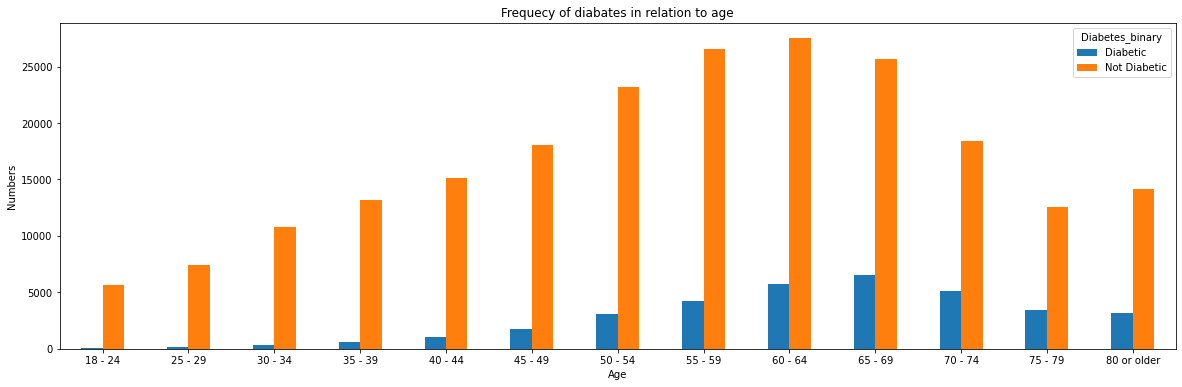

In [ ]:
#Age relation with diabetes binary
pd.crosstab(df2.Age,df2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Frequecy of diabates in relation to age')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.show()

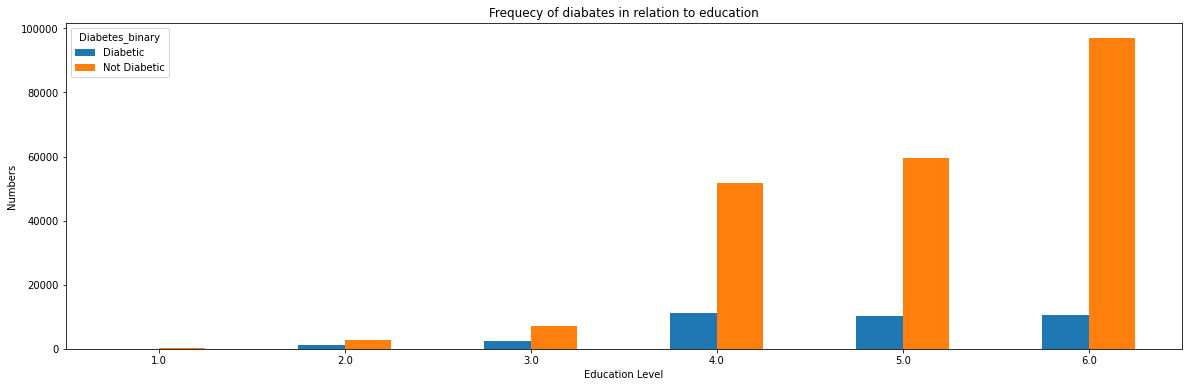

In [ ]:
#relation of education with diabetes
pd.crosstab(df.Education,df2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Frequecy of diabates in relation to education')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.show()

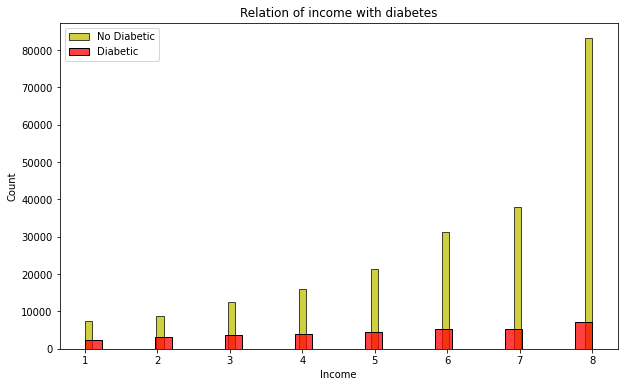

In [ ]:
#relation of income with diabetes
plt.figure(figsize=(10,6))


sns.histplot(df.Income[df.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.histplot(df.Income[df.Diabetes_binary == 1], color="r", label="Diabetic" )
plt.title("Relation of income with diabetes")

plt.legend()

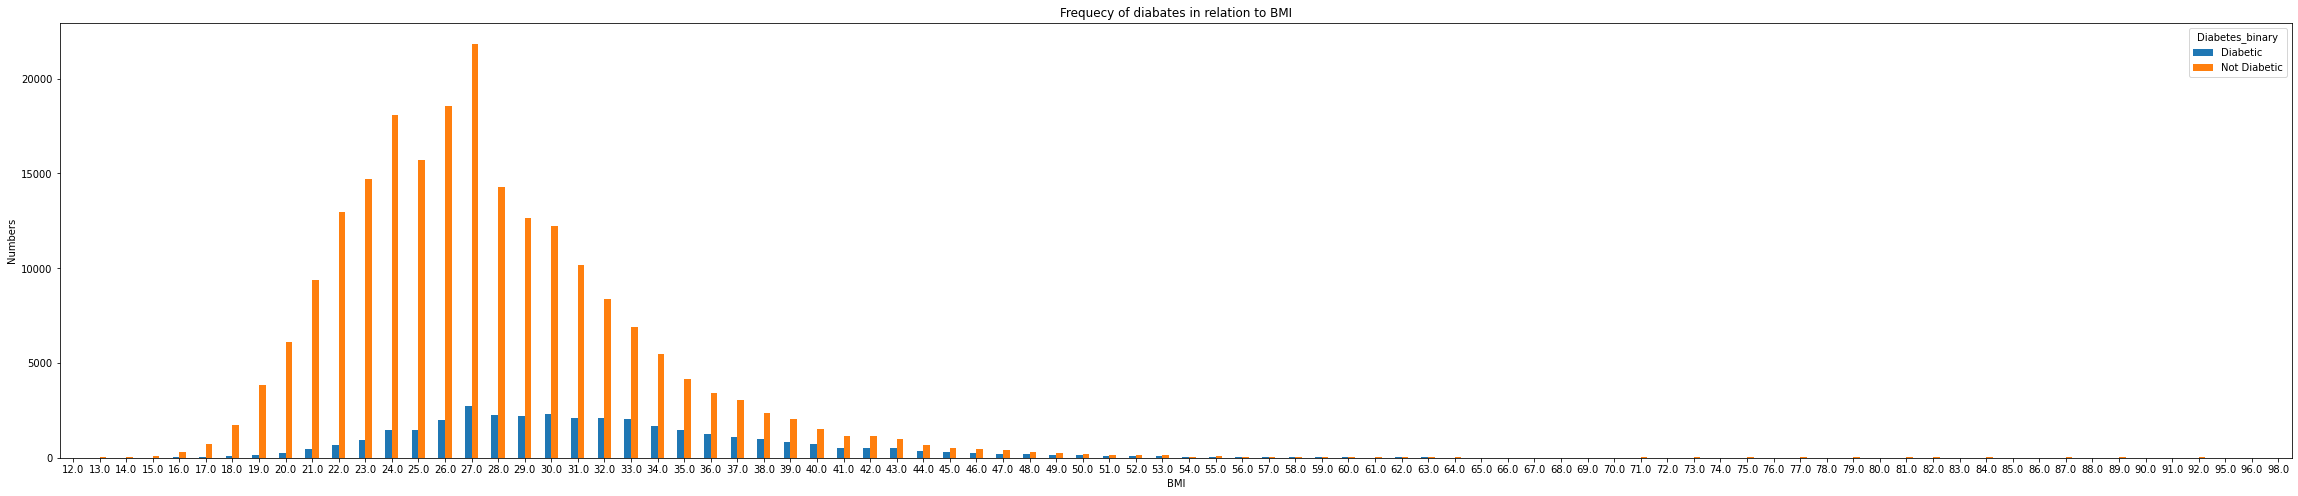

In [ ]:
#see the relation of  BMI and diabetes
pd.crosstab(df2.BMI,df2.Diabetes_binary).plot(kind="bar",figsize=(40,8))
plt.title('Frequecy of diabates in relation to BMI')
plt.xlabel('BMI')
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.show()



---



### Feature Selection

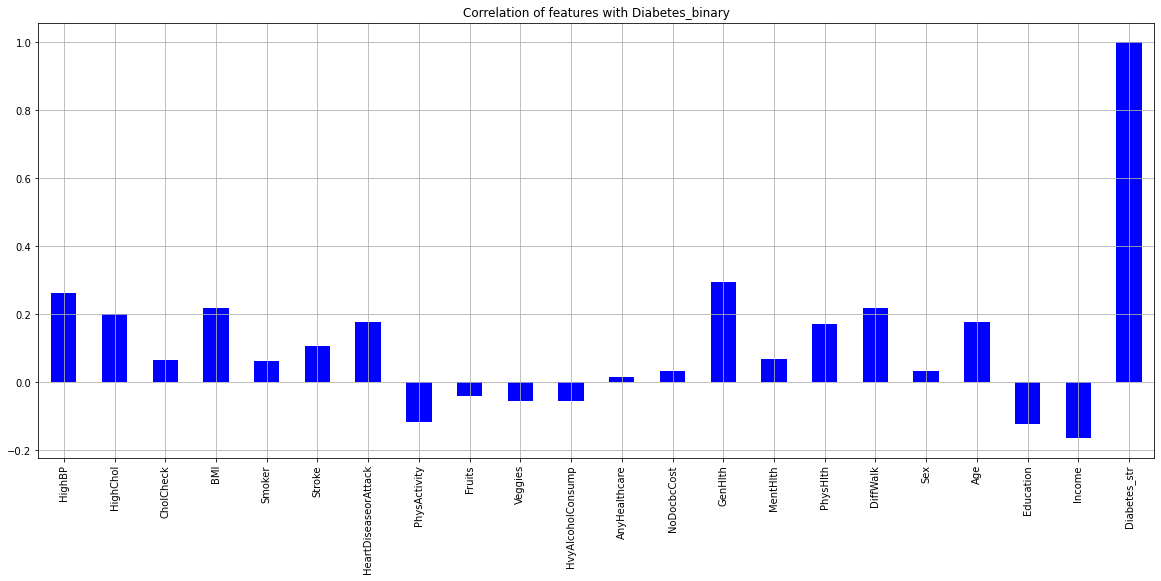

In [ ]:
# use bar graph to see the correlation of the features to diabete binary
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation of features with Diabetes_binary",color="Blue");

In [ ]:
#use chi square to select best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,1:]
Y = df.iloc[:,0]

feature_comparison = SelectKBest(score_func=chi2, k=10)
f = feature_comparison.fit(X,Y)

feature_scores = pd.DataFrame(f.scores_)
features = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores_table = pd.concat([features,feature_scores],axis=1)              
f_Scores_table.columns = ['Feature','Score']

f_Scores_table.sort_values(by=['Score'],ascending=False)

Feature          Score
21          Diabetes_str  218334.000000
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412
8                 Fruits     154.291404
9                Veggies     153.169215
17                   Sex     140.248274
2              CholCheck      39.716825
11         AnyHealthcare       3.280938

Features with score lower than 100 will be removed. In this case, veggies, fruits, sex, cholcheck and anyhealth care will be removed as features.

In [ ]:
disqualified_features = ["Veggies" , "Fruits" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_str"]

In [ ]:
df.drop(disqualified_features,axis= 1 ,inplace=True)



---



### Logistic Regression

# base model

In [ ]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#seprating to DV and IV
X=df.iloc[:,1:]
Y= df['Diabetes_binary']

In [ ]:
#balancing the dataset for better results
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

X,Y= nm.fit_resample(X,Y)
Y.shape , X.shape

Y.value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [ ]:
#split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(53019, 16)
(17673, 16)
(53019,)
(17673,)


In [ ]:
model = LogisticRegression(C=1,solver = 'liblinear', random_state=0)
model.fit(X_train,y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [ ]:
#the attribute .classes_ represents the array of distinct values that y takes
model.classes_

array([0., 1.])

In [ ]:
#evaluate the model
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)

Intercept:  [-0.86437]
Slope:  [[ 0.11545764  0.04750322  0.11126939  0.23343566  2.26536346  1.27622948
  -1.03454243  1.20610457  2.23375185  0.57828046  2.01993551  1.3602015
   1.88580467 -0.02669662 -0.21273198 -0.43650484]]


In [ ]:
model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
model.score(X_test,y_test)

0.8770440785378827

In [ ]:
confusion_matrix(y_test,model.predict(X_test))

array([[8136,  553],
       [1620, 7364]])

In [ ]:
#comprehensive report on the classification 
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      8689
         1.0       0.93      0.82      0.87      8984

    accuracy                           0.88     17673
   macro avg       0.88      0.88      0.88     17673
weighted avg       0.88      0.88      0.88     17673



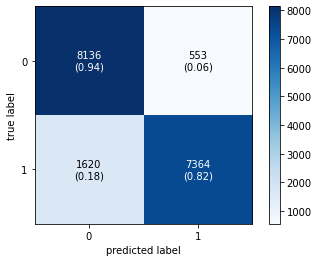

In [ ]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,model.predict(X_test))
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Base model with SGD classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_base = SGDClassifier(loss = 'log', max_iter = 1000, alpha = 0.0001)
#n_iter = max_iter, alpha = tol
sgd_base.fit(X_train,y_train)
Y_pred = sgd_base.predict(X_test)

print("Coefficients: \n",sgd_base.coef_)
print("Y_intercept: \n",sgd_base.intercept_)
print("Score: \n",sgd_base.score(X_test,y_test))

Coefficients: 
 [[ 0.14078984  0.10060952  0.0924225   0.27361356  2.49848357  1.49482183
  -1.2157154   1.34435061  2.42748655  0.67933682  2.30022241  1.5870528
   2.20638207 -0.04927082 -0.25386429 -0.50892513]]
Y_intercept: 
 [-1.12693383]
Score: 
 0.85718327392067


In [ ]:
#comprehensive report on the classification 
print(classification_report(y_test,sgd_base.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87      8689
         1.0       0.99      0.73      0.84      8984

    accuracy                           0.86     17673
   macro avg       0.88      0.86      0.86     17673
weighted avg       0.88      0.86      0.85     17673



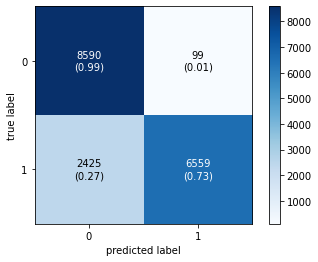

In [ ]:
#confusion matrix
cm2 = confusion_matrix(y_test,sgd_base.predict(X_test))
plot_confusion_matrix(conf_mat=cm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Perform the GridSearch (hyper parameter tuning)

In [ ]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm3 = confusion_matrix(y_test,clf3.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'solver':('lbfgs','liblinear','saga','sag','newton-cg'),'penalty':('l2','l1','elasticnet'),
              'C':[0.1,0.5,1,2,3,5],
              'max_iter':[100,1000,5000,10000,20000]}
model5 = LogisticRegression(random_state = 0)
clf3=GridSearchCV(model5 , parameters)
clf3.fit(X_train,y_train)

In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(clf3.cv_results_['params'])
mean_test_score = pd.DataFrame(clf3.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['C','max_iter','penalty','solver','mean test score']
#print(combination_table)
combination_table.sort_values(by=['mean test score'],ascending=False)

C  max_iter     penalty     solver  mean test score
36   0.1      5000          l1  liblinear          0.87429
51   0.1     10000          l1  liblinear          0.87429
21   0.1      1000          l1  liblinear          0.87429
6    0.1       100          l1  liblinear          0.87429
66   0.1     20000          l1  liblinear          0.87429
..   ...       ...         ...        ...              ...
445  5.0     20000  elasticnet      lbfgs              NaN
446  5.0     20000  elasticnet  liblinear              NaN
447  5.0     20000  elasticnet       saga              NaN
448  5.0     20000  elasticnet        sag              NaN
449  5.0     20000  elasticnet  newton-cg              NaN

[450 rows x 5 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
clf3.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
clf3.best_score_

0.8742903610157378

In [ ]:
clf3.best_estimator_.intercept_

array([-0.55608433])

In [ ]:
clf3.best_estimator_.coef_

array([[ 0.11828306,  0.04568883,  0.10734811,  0.22350049,  2.1309941 ,
         1.25947305, -1.03269323,  1.10325905,  2.04699662,  0.56386707,
         1.96069701,  1.34382807,  1.84250504, -0.03327858, -0.22287713,
        -0.44082347]])

In [ ]:
#comprehensive report on the classification 
print(classification_report(y_test,clf3.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      8689
         1.0       0.93      0.82      0.87      8984

    accuracy                           0.88     17673
   macro avg       0.88      0.88      0.88     17673
weighted avg       0.88      0.88      0.88     17673



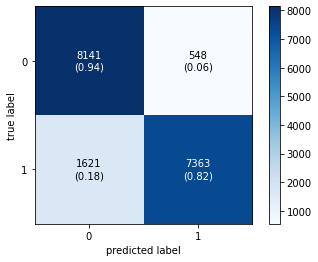

In [ ]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm3 = confusion_matrix(y_test,clf3.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Performing GridsearchCV for SGDClassifier

In [ ]:

parameters = {'loss':('hinge','log','modified_huber'),'penalty':('l2','l1','elasticnet'),
              'alpha':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1],
              'max_iter':[1000,5000,10000,20000],}
model3 = SGDClassifier(random_state = 0)
clf=GridSearchCV(model3 , parameters)
clf.fit(X_train,y_train)

In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(clf.cv_results_['params'])
mean_test_score = pd.DataFrame(clf.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['alpha','loss','max_iter','penalty','mean test score']
#print(combination_table)
combination_table.sort_values(by=['mean test score'],ascending=False)

alpha            loss  max_iter     penalty  mean test score
108  0.001000           hinge      1000          l2         0.873442
111  0.001000           hinge      5000          l2         0.873442
114  0.001000           hinge     10000          l2         0.873442
117  0.001000           hinge     20000          l2         0.873442
88   0.000100             log      5000          l1         0.870480
..        ...             ...       ...         ...              ...
2    0.000001           hinge      1000  elasticnet         0.781702
105  0.000100  modified_huber     20000          l2         0.768085
102  0.000100  modified_huber     10000          l2         0.768085
99   0.000100  modified_huber      5000          l2         0.768085
96   0.000100  modified_huber      1000          l2         0.768085

[216 rows x 5 columns]

In [ ]:
clf.best_params_

{'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}

In [ ]:
clf.best_score_

0.8734415428641953

In [ ]:
clf.best_estimator_.intercept_

array([-2.66938452])

In [ ]:
clf.best_estimator_.coef_

array([[-0.01137597,  0.0185608 ,  0.09010967,  0.17872251,  1.38128253,
         0.92324996, -0.69004253,  0.68525264,  1.32380393,  0.50263835,
         1.33068939,  1.06604835,  1.37110402,  0.01766269, -0.02903867,
        -0.31343797]])

In [ ]:
#comprehensive report on the classification 
print(classification_report(y_test,clf.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88      8689
         1.0       0.97      0.76      0.85      8984

    accuracy                           0.87     17673
   macro avg       0.88      0.87      0.87     17673
weighted avg       0.89      0.87      0.86     17673



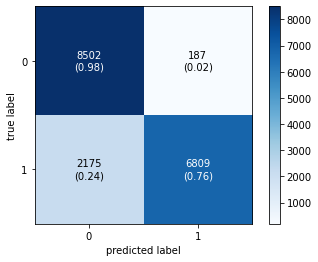

In [ ]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm4 = confusion_matrix(y_test,clf.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_mat=cm4,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#DNN

Base-Model

In [ ]:
from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Dense, Dropout

from keras.utils import np_utils

X_train = X_train.astype('float32')

X_test = X_test.astype('float32')

NameError: ignored

In [ ]:
# building a linear stack of layers with the sequential model

L1=200
L2=150
L3=50
L4=10
L5=5

model = Sequential()
model.add(Dense(L1,input_dim=16,activation='relu'))

# hidden layer
model.add(Dense(L2,activation='relu'))
model.add(Dense(L3,activation='relu'))
model.add(Dense(L4,activation='relu'))
model.add(Dense(L5,activation='relu'))

# output layer (if yes or no then use 1) (softmax use for multinomial classification(more than 2 category))
model.add(Dense(1, activation='sigmoid'))


NameError: ignored

In [ ]:
# compiling the sequential model (use accuracy as it is categorical data) (loss use categorical_crossentropy as teh problem is not binary )
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# training the model for 10 epochs
history = model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
531/531 [==============================] - 5s 5ms/step - loss: 0.3193 - accuracy: 0.8592 - val_loss: 0.2782 - val_accuracy: 0.8843
Epoch 2/10
531/531 [==============================] - 2s 4ms/step - loss: 0.2840 - accuracy: 0.8792 - val_loss: 0.2870 - val_accuracy: 0.8800
Epoch 3/10
531/531 [==============================] - 2s 4ms/step - loss: 0.2761 - accuracy: 0.8814 - val_loss: 0.2645 - val_accuracy: 0.8861
Epoch 4/10
531/531 [==============================] - 2s 4ms/step - loss: 0.2702 - accuracy: 0.8842 - val_loss: 0.2574 - val_accuracy: 0.8915
Epoch 5/10
531/531 [==============================] - 2s 4ms/step - loss: 0.2664 - accuracy: 0.8869 - val_loss: 0.2548 - val_accuracy: 0.8931
Epoch 6/10
531/531 [==============================] - 2s 4ms/step - loss: 0.2647 - accuracy: 0.8875 - val_loss: 0.2929 - val_accuracy: 0.8640
Epoch 7/10
531/531 [==============================] - 2s 4ms/step - loss: 0.2587 - accuracy: 0.8903 - val_loss: 0.2580 - val_accuracy: 0.8897
Epoch 

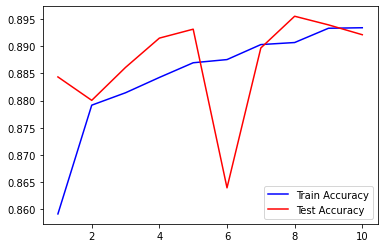

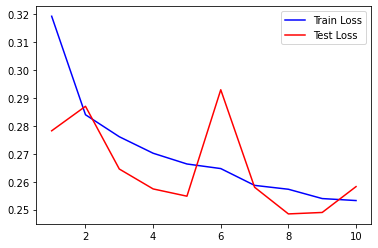

In [ ]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,model.predict(X_test).round()))

553/553 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      8689
         1.0       0.92      0.86      0.89      8984

    accuracy                           0.89     17673
   macro avg       0.89      0.89      0.89     17673
weighted avg       0.89      0.89      0.89     17673



In [ ]:
confusion_matrix(y_test,model.predict(X_test).round())

553/553 [==============================] - 1s 2ms/step


array([[8005,  684],
       [1223, 7761]])

553/553 [==============================] - 1s 2ms/step


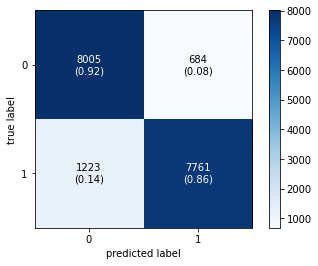

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,model.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Hyperparameter Tuning

 (6 layers)

Tune the Batch Size and Epochs

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import GridSearchCV #use for deep learning technique
from scikeras.wrappers import KerasClassifier

In [ ]:
# Function to create model, required for KerasClassifier (6 layers)
def create_model():
  #create model
  model = Sequential()
  model.add(Dense(1000, input_dim = 16, activation='relu'))
  model.add(Dense(800, activation = 'relu'))
  model.add(Dense(400, activation = 'relu'))
  model.add(Dense(200, activation = 'relu'))
  model.add(Dense(100, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
# create model
model = KerasClassifier(model=create_model, verbose=1)

# define the grid search parameters
batch_size = [100, 150, 200, 250]
epochs = [15, 20, 25, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/30
354/354 [==============================] - 2s 3ms/step - loss: 0.3104 - accuracy: 0.8658
Epoch 2/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2788 - accuracy: 0.8812
Epoch 3/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2704 - accuracy: 0.8850
Epoch 4/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2650 - accuracy: 0.8870
Epoch 5/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2605 - accuracy: 0.8902
Epoch 6/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2586 - accuracy: 0.8913
Epoch 7/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2555 - accuracy: 0.8929
Epoch 8/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2546 - accuracy: 0.8930
Epoch 9/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2520 - accuracy: 0.8949
Epoch 10/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2535 - accuracy: 0.8935

In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(grid_result.cv_results_['params'])
mean_test_score = pd.DataFrame(grid_result.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['batch_size','epochs','mean_test_score']
#print(combination_table)
combination_table.sort_values(by=['mean_test_score'],ascending=False)

batch_size  epochs  mean_test_score
7          150      30         0.896433
9          200      20         0.896320
15         250      30         0.896264
11         200      30         0.895981
14         250      25         0.895679
3          100      30         0.895622
8          200      15         0.895490
5          150      20         0.894811
6          150      25         0.894132
10         200      25         0.894113
13         250      20         0.894057
2          100      25         0.894038
12         250      15         0.893284
4          150      15         0.893152
1          100      20         0.891963
0          100      15         0.885947

In [ ]:
# Summarize result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.896433 using {'batch_size': 150, 'epochs': 30}
0.885947 (0.006621) with {'batch_size': 100, 'epochs': 15}
0.891963 (0.002742) with {'batch_size': 100, 'epochs': 20}
0.894038 (0.003836) with {'batch_size': 100, 'epochs': 25}
0.895622 (0.000814) with {'batch_size': 100, 'epochs': 30}
0.893152 (0.002662) with {'batch_size': 150, 'epochs': 15}
0.894811 (0.002491) with {'batch_size': 150, 'epochs': 20}
0.894132 (0.003407) with {'batch_size': 150, 'epochs': 25}
0.896433 (0.003216) with {'batch_size': 150, 'epochs': 30}
0.895490 (0.002523) with {'batch_size': 200, 'epochs': 15}
0.896320 (0.001160) with {'batch_size': 200, 'epochs': 20}
0.894113 (0.004070) with {'batch_size': 200, 'epochs': 25}
0.895981 (0.002473) with {'batch_size': 200, 'epochs': 30}
0.893284 (0.003342) with {'batch_size': 250, 'epochs': 15}
0.894057 (0.000341) with {'batch_size': 250, 'epochs': 20}
0.895679 (0.002290) with {'batch_size': 250, 'epochs': 25}
0.896264 (0.001689) with {'batch_size': 250, 'epochs': 30}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,grid_result.best_estimator_.predict(X_test).round()))

118/118 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      8689
         1.0       0.99      0.80      0.89      8984

    accuracy                           0.89     17673
   macro avg       0.91      0.90      0.89     17673
weighted avg       0.91      0.89      0.89     17673



In [ ]:
confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())

118/118 [==============================] - 0s 3ms/step


array([[8595,   94],
       [1766, 7218]])

118/118 [==============================] - 0s 3ms/step


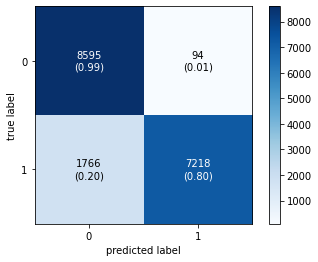

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Tune the Training Optimization Algorithm

In [ ]:
# create model
model = KerasClassifier(model=create_model, loss='binary_crossentropy', epochs=30, batch_size=150, verbose=1)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/30
354/354 [==============================] - 2s 3ms/step - loss: 0.3131 - accuracy: 0.8625
Epoch 2/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2776 - accuracy: 0.8805
Epoch 3/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2706 - accuracy: 0.8840
Epoch 4/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2660 - accuracy: 0.8861
Epoch 5/30
354/354 [==============================] - 1s 4ms/step - loss: 0.2618 - accuracy: 0.8887
Epoch 6/30
354/354 [==============================] - 1s 4ms/step - loss: 0.2599 - accuracy: 0.8897
Epoch 7/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2565 - accuracy: 0.8927
Epoch 8/30
354/354 [==============================] - 1s 3ms/step - loss: 0.2563 - accuracy: 0.8926
Epoch 9/30
354/354 [==============================] - 1s 4ms/step - loss: 0.2530 - accuracy: 0.8942
Epoch 10/30
354/354 [==============================] - 1s 4ms/step - loss: 0.2541 - accuracy: 0.8935

In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(grid_result.cv_results_['params'])
mean_test_score = pd.DataFrame(grid_result.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['params','mean_test_score']
#print(combination_table)
combination_table.sort_values(by=['mean_test_score'],ascending=False)

params  mean_test_score
3  Adadelta         0.897037
2   Adagrad         0.896773
6     Nadam         0.895943
0       SGD         0.895924
1   RMSprop         0.895132
5    Adamax         0.894849
4      Adam         0.894604

In [ ]:
# summaraize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.897037 using {'optimizer': 'Adadelta'}
0.895924 (0.001807) with {'optimizer': 'SGD'}
0.895132 (0.001147) with {'optimizer': 'RMSprop'}
0.896773 (0.001703) with {'optimizer': 'Adagrad'}
0.897037 (0.002558) with {'optimizer': 'Adadelta'}
0.894604 (0.001363) with {'optimizer': 'Adam'}
0.894849 (0.003589) with {'optimizer': 'Adamax'}
0.895943 (0.002498) with {'optimizer': 'Nadam'}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,grid_result.best_estimator_.predict(X_test).round()))

118/118 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91      8689
         1.0       0.96      0.84      0.90      8984

    accuracy                           0.90     17673
   macro avg       0.91      0.90      0.90     17673
weighted avg       0.91      0.90      0.90     17673



In [ ]:
confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())

118/118 [==============================] - 0s 2ms/step


array([[8371,  318],
       [1439, 7545]])

118/118 [==============================] - 0s 2ms/step


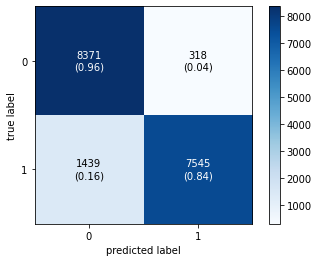

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Tune the Neuron Activation Function

In [ ]:
# Function to create model, required for KerasClassifier

def create_model(activation = 'relu'):

  # create model

  model = Sequential()

  model.add(Dense(1000, input_dim = 16, activation=activation))
  model.add(Dense(800, activation = activation))
  model.add(Dense(400, activation = activation))
  model.add(Dense(200, activation = activation))
  model.add(Dense(100, activation = activation))
  model.add(Dense(1, activation = 'sigmoid'))



  # Compile model

  model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

  return model

In [ ]:
model = KerasClassifier(model=create_model, epochs=30, batch_size=150, verbose=0)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

param_grid = dict(model__activation=activation)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

In [ ]:
# summaraize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.866388 using {'model__activation': 'linear'}
0.500915 (0.002627) with {'model__activation': 'softmax'}
0.845150 (0.002955) with {'model__activation': 'softplus'}
0.858334 (0.003047) with {'model__activation': 'softsign'}
0.859088 (0.002415) with {'model__activation': 'relu'}
0.862842 (0.002859) with {'model__activation': 'tanh'}
0.502782 (0.000027) with {'model__activation': 'sigmoid'}
0.502782 (0.000027) with {'model__activation': 'hard_sigmoid'}
0.866388 (0.002298) with {'model__activation': 'linear'}


In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(grid_result.cv_results_['params'])
mean_test_score = pd.DataFrame(grid_result.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['model__activation','mean_test_score']
#print(combination_table)
combination_table.sort_values(by=['mean_test_score'],ascending=False)

model__activation  mean_test_score
7            linear         0.866388
4              tanh         0.862842
3              relu         0.859088
2          softsign         0.858334
1          softplus         0.845150
5           sigmoid         0.502782
6      hard_sigmoid         0.502782
0           softmax         0.500915

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,grid_result.best_estimator_.predict(X_test).round()))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      8689
         1.0       0.91      0.82      0.87      8984

    accuracy                           0.87     17673
   macro avg       0.87      0.87      0.87     17673
weighted avg       0.87      0.87      0.87     17673



In [ ]:
confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())

array([[7995,  694],
       [1592, 7392]])

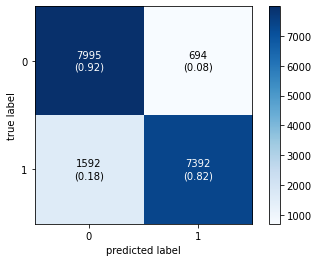

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

(5 layers)

Tune the Batch Size and Epochs

In [ ]:
# Function to create model, required for KerasClassifier (5 layers)
def create_model2():
  #create model
  model2 = Sequential()
  model2.add(Dense(1000, input_dim = 16, activation='relu'))
  model2.add(Dense(800, activation = 'relu'))
  model2.add(Dense(400, activation = 'relu'))
  model2.add(Dense(100, activation = 'relu'))
  model2.add(Dense(1, activation = 'sigmoid'))

  # Compile model
  model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model2

In [ ]:
# create model
model2 = KerasClassifier(model=create_model2, verbose=1)

# define the grid search parameters
batch_size = [100, 150, 200, 250]
epochs = [15, 20, 25, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/25
354/354 [==============================] - 2s 3ms/step - loss: 0.3152 - accuracy: 0.8616
Epoch 2/25
354/354 [==============================] - 1s 3ms/step - loss: 0.2804 - accuracy: 0.8804
Epoch 3/25
354/354 [==============================] - 1s 3ms/step - loss: 0.2706 - accuracy: 0.8845
Epoch 4/25
354/354 [==============================] - 1s 3ms/step - loss: 0.2672 - accuracy: 0.8860
Epoch 5/25
354/354 [==============================] - 1s 3ms/step - loss: 0.2620 - accuracy: 0.8892
Epoch 6/25
354/354 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.8906
Epoch 7/25
354/354 [==============================] - 1s 3ms/step - loss: 0.2573 - accuracy: 0.8914
Epoch 8/25
354/354 [==============================] - 1s 3ms/step - loss: 0.2560 - accuracy: 0.8927
Epoch 9/25
354/354 [==============================] - 1s 4ms/step - loss: 0.2566 - accuracy: 0.8921
Epoch 10/25
354/354 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.8941

In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(grid_result.cv_results_['params'])
mean_test_score = pd.DataFrame(grid_result.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['batch_size','epochs','mean_test_score']
#print(combination_table)
combination_table.sort_values(by=['mean_test_score'],ascending=False)

batch_size  epochs  mean_test_score
6          150      25         0.896697
10         200      25         0.896509
1          100      20         0.896037
3          100      30         0.895396
14         250      25         0.895075
15         250      30         0.894566
7          150      30         0.894396
13         250      20         0.894208
0          100      15         0.894170
9          200      20         0.893642
2          100      25         0.893453
5          150      20         0.893227
12         250      15         0.893170
11         200      30         0.893152
4          150      15         0.891228
8          200      15         0.888889

In [ ]:
# Summarize result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.896697 using {'batch_size': 150, 'epochs': 25}
0.894170 (0.002980) with {'batch_size': 100, 'epochs': 15}
0.896037 (0.001964) with {'batch_size': 100, 'epochs': 20}
0.893453 (0.002454) with {'batch_size': 100, 'epochs': 25}
0.895396 (0.000867) with {'batch_size': 100, 'epochs': 30}
0.891228 (0.003423) with {'batch_size': 150, 'epochs': 15}
0.893227 (0.001967) with {'batch_size': 150, 'epochs': 20}
0.896697 (0.000870) with {'batch_size': 150, 'epochs': 25}
0.894396 (0.004184) with {'batch_size': 150, 'epochs': 30}
0.888889 (0.002512) with {'batch_size': 200, 'epochs': 15}
0.893642 (0.003604) with {'batch_size': 200, 'epochs': 20}
0.896509 (0.003081) with {'batch_size': 200, 'epochs': 25}
0.893152 (0.003439) with {'batch_size': 200, 'epochs': 30}
0.893170 (0.003884) with {'batch_size': 250, 'epochs': 15}
0.894208 (0.002833) with {'batch_size': 250, 'epochs': 20}
0.895075 (0.001457) with {'batch_size': 250, 'epochs': 25}
0.894566 (0.003886) with {'batch_size': 250, 'epochs': 30}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,grid_result.best_estimator_.predict(X_test).round()))

118/118 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91      8689
         1.0       0.98      0.82      0.89      8984

    accuracy                           0.90     17673
   macro avg       0.91      0.90      0.90     17673
weighted avg       0.91      0.90      0.90     17673



In [ ]:
confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())

118/118 [==============================] - 0s 1ms/step


array([[8532,  157],
       [1618, 7366]])

118/118 [==============================] - 0s 1ms/step


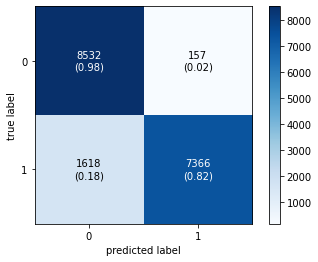

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Tune the Training Optimization Algorithm

In [ ]:
# create model
model2 = KerasClassifier(model=create_model2, loss='binary_crossentropy', epochs=25, batch_size=150, verbose=1)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/25
354/354 [==============================] - 2s 3ms/step - loss: 0.3122 - accuracy: 0.8632
Epoch 2/25
354/354 [==============================] - 1s 4ms/step - loss: 0.2800 - accuracy: 0.8809
Epoch 3/25
354/354 [==============================] - 1s 3ms/step - loss: 0.2702 - accuracy: 0.8835
Epoch 4/25
354/354 [==============================] - 1s 4ms/step - loss: 0.2623 - accuracy: 0.8893
Epoch 5/25
354/354 [==============================] - 1s 4ms/step - loss: 0.2593 - accuracy: 0.8902
Epoch 6/25
354/354 [==============================] - 1s 4ms/step - loss: 0.2567 - accuracy: 0.8919
Epoch 7/25
354/354 [==============================] - 1s 4ms/step - loss: 0.2562 - accuracy: 0.8922
Epoch 8/25
354/354 [==============================] - 1s 4ms/step - loss: 0.2540 - accuracy: 0.8934
Epoch 9/25
354/354 [==============================] - 1s 4ms/step - loss: 0.2543 - accuracy: 0.8938
Epoch 10/25
354/354 [==============================] - 1s 3ms/step - loss: 0.2534 - accuracy: 0.8933

In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(grid_result.cv_results_['params'])
mean_test_score = pd.DataFrame(grid_result.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['solver','mean test score']
#print(combination_table)
combination_table.sort_values(by=['mean test score'],ascending=False)

solver  mean test score
0       SGD         0.896716
6     Nadam         0.896339
5    Adamax         0.895056
3  Adadelta         0.894717
2   Adagrad         0.893397
1   RMSprop         0.893265
4      Adam         0.891982

In [ ]:
# Summarize result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.896716 using {'optimizer': 'SGD'}
0.896716 (0.001695) with {'optimizer': 'SGD'}
0.893265 (0.003641) with {'optimizer': 'RMSprop'}
0.893397 (0.003132) with {'optimizer': 'Adagrad'}
0.894717 (0.004036) with {'optimizer': 'Adadelta'}
0.891982 (0.000722) with {'optimizer': 'Adam'}
0.895056 (0.002004) with {'optimizer': 'Adamax'}
0.896339 (0.003374) with {'optimizer': 'Nadam'}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,grid_result.best_estimator_.predict(X_test).round()))

118/118 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      8689
         1.0       0.97      0.83      0.90      8984

    accuracy                           0.90     17673
   macro avg       0.91      0.90      0.90     17673
weighted avg       0.91      0.90      0.90     17673



In [ ]:
confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())

118/118 [==============================] - 0s 4ms/step


array([[8442,  247],
       [1486, 7498]])

118/118 [==============================] - 0s 2ms/step


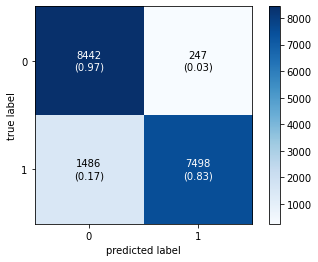

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Tune the Neuron Activation Function

In [ ]:
# Function to create model, required for KerasClassifier

def create_model2(activation = 'relu'):

  # create model

  model2 = Sequential()

  model2.add(Dense(1000, input_dim = 16, activation= activation))
  model2.add(Dense(800, activation = activation))
  model2.add(Dense(400, activation = activation))
  model2.add(Dense(100, activation = activation))
  model2.add(Dense(1, activation='sigmoid'))



  # Compile model

  model2.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

  return model2

In [ ]:
model2 = KerasClassifier(model=create_model2, epochs=25, batch_size=150, verbose=0)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

param_grid = dict(model__activation=activation)

grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

In [ ]:
# Summarize result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.880571 using {'model__activation': 'relu'}
0.502782 (0.000027) with {'model__activation': 'softmax'}
0.855297 (0.007469) with {'model__activation': 'softplus'}
0.875724 (0.000387) with {'model__activation': 'softsign'}
0.880571 (0.001375) with {'model__activation': 'relu'}
0.877648 (0.001911) with {'model__activation': 'tanh'}
0.839793 (0.004543) with {'model__activation': 'sigmoid'}
0.724420 (0.025800) with {'model__activation': 'hard_sigmoid'}
0.857768 (0.008284) with {'model__activation': 'linear'}


In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(grid_result.cv_results_['params'])
mean_test_score = pd.DataFrame(grid_result.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['solver','mean test score']
#print(combination_table)
combination_table.sort_values(by=['mean test score'],ascending=False)

solver  mean test score
3          relu         0.880571
4          tanh         0.877648
2      softsign         0.875724
7        linear         0.857768
1      softplus         0.855297
5       sigmoid         0.839793
6  hard_sigmoid         0.724420
0       softmax         0.502782

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,grid_result.best_estimator_.predict(X_test).round()))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      8689
         1.0       0.93      0.85      0.89      8984

    accuracy                           0.89     17673
   macro avg       0.89      0.89      0.89     17673
weighted avg       0.89      0.89      0.89     17673



In [ ]:
confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())

array([[8082,  607],
       [1365, 7619]])

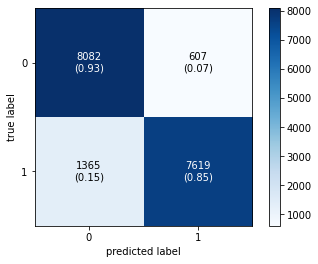

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# RNN

In [ ]:
from keras_preprocessing.sequence import pad_sequences
from keras.datasets import reuters

In [ ]:
#reshape train and test data as RNN requires 3d input
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
print(X_train.shape)

(53019, 16, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN



model = Sequential()


model.add(LSTM(32,activation='relu')) #model.add(LSTM(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
531/531 [==============================] - 16s 28ms/step - loss: 0.3435 - acc: 0.8452 - val_loss: 0.2992 - val_acc: 0.8669
Epoch 2/10
531/531 [==============================] - 17s 31ms/step - loss: 0.3067 - acc: 0.8637 - val_loss: 0.2886 - val_acc: 0.8703
Epoch 3/10
531/531 [==============================] - 18s 34ms/step - loss: 0.2921 - acc: 0.8711 - val_loss: 0.2949 - val_acc: 0.8679
Epoch 4/10
531/531 [==============================] - 15s 28ms/step - loss: 0.2808 - acc: 0.8765 - val_loss: 0.2643 - val_acc: 0.8833
Epoch 5/10
531/531 [==============================] - 17s 32ms/step - loss: 0.2757 - acc: 0.8794 - val_loss: 0.2722 - val_acc: 0.8809
Epoch 6/10
531/531 [==============================] - 16s 29ms/step - loss: 0.2673 - acc: 0.8847 - val_loss: 0.2574 - val_acc: 0.8889
Epoch 7/10
531/531 [==============================] - 16s 31ms/step - loss: 0.2640 - acc: 0.8864 - val_loss: 0.2512 - val_acc: 0.8927
Epoch 8/10
531/531 [==============================] - 15s 28ms

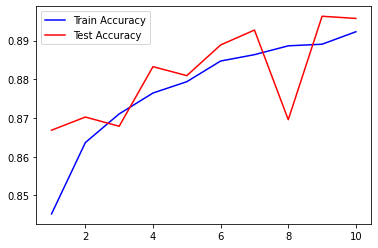

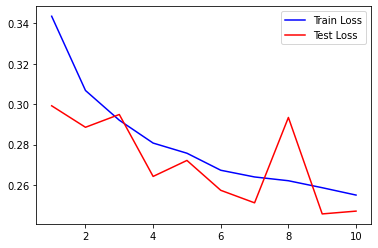

In [ ]:
import matplotlib.pyplot as plt
acc2 = history.history['acc']
val_acc = history.history['val_acc']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,model.predict(X_test).round()))

553/553 [==============================] - 3s 5ms/step
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      8689
         1.0       0.95      0.84      0.89      8984

    accuracy                           0.90     17673
   macro avg       0.90      0.90      0.90     17673
weighted avg       0.90      0.90      0.90     17673



In [ ]:
confusion_matrix(y_test,model.predict(X_test).round())

553/553 [==============================] - 2s 4ms/step


array([[8311,  378],
       [1465, 7519]])

553/553 [==============================] - 2s 4ms/step


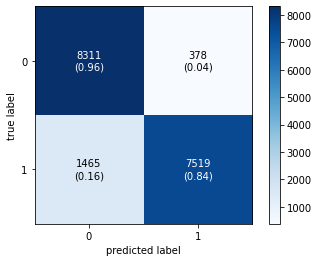

In [ ]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,model.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Hyperparameter tuning

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = Sequential()

model.add(SimpleRNN(64,activation='relu',input_shape=(16,1),return_sequences = True))
model.add(SimpleRNN(64,activation='relu',return_sequences = True))
model.add(SimpleRNN(64,activation='relu'))
model.add(Dense(46,activation='relu'))

model.add(Dense(1,activation='sigmoid'))


In [ ]:
#Step 3: Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
531/531 [==============================] - 23s 40ms/step - loss: 0.3174 - acc: 0.8604 - val_loss: 0.3018 - val_acc: 0.8685
Epoch 2/10
531/531 [==============================] - 21s 40ms/step - loss: 0.2876 - acc: 0.8768 - val_loss: 0.3014 - val_acc: 0.8683
Epoch 3/10
531/531 [==============================] - 21s 40ms/step - loss: 0.2834 - acc: 0.8778 - val_loss: 0.2670 - val_acc: 0.8876
Epoch 4/10
531/531 [==============================] - 21s 39ms/step - loss: 0.2732 - acc: 0.8830 - val_loss: 0.2627 - val_acc: 0.8861
Epoch 5/10
531/531 [==============================] - 21s 39ms/step - loss: 0.2691 - acc: 0.8844 - val_loss: 0.2697 - val_acc: 0.8850
Epoch 6/10
531/531 [==============================] - 21s 39ms/step - loss: 0.2644 - acc: 0.8883 - val_loss: 0.2491 - val_acc: 0.8948
Epoch 7/10
531/531 [==============================] - 21s 40ms/step - loss: 0.2626 - acc: 0.8886 - val_loss: 0.2872 - val_acc: 0.8715
Epoch 8/10
531/531 [==============================] - 25s 47ms

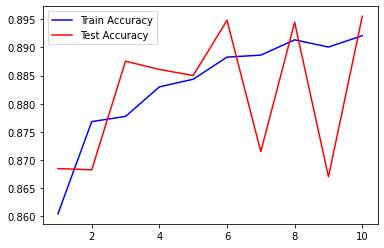

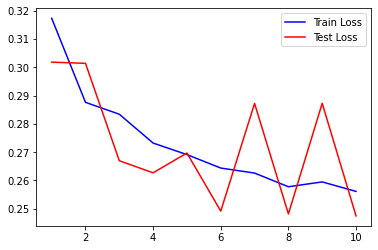

In [ ]:
import matplotlib.pyplot as plt
acc2 = history.history['acc']
val_acc = history.history['val_acc']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,model.predict(X_test).round()))

553/553 [==============================] - 3s 5ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      8689
         1.0       0.98      0.82      0.89      8984

    accuracy                           0.90     17673
   macro avg       0.91      0.90      0.90     17673
weighted avg       0.91      0.90      0.89     17673



In [ ]:
confusion_matrix(y_test,model.predict(X_test).round())

553/553 [==============================] - 3s 5ms/step


array([[8505,  184],
       [1662, 7322]])

553/553 [==============================] - 3s 5ms/step


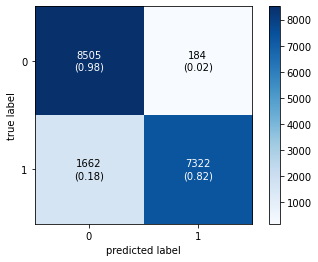

In [ ]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,model.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
model = Sequential()


model.add(SimpleRNN(32,input_shape=(16,1),activation='relu')) #model.add(LSTM(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(binary_crossentropy, optimizer='adam', metrics=['acc'])
history = model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
531/531 [==============================] - 47s 30ms/step - loss: 0.3596 - acc: 0.8309 - val_loss: 0.3061 - val_acc: 0.8605
Epoch 2/10
531/531 [==============================] - 16s 31ms/step - loss: 0.3080 - acc: 0.8628 - val_loss: 0.2974 - val_acc: 0.8700
Epoch 3/10
531/531 [==============================] - 16s 30ms/step - loss: 0.2981 - acc: 0.8679 - val_loss: 0.2953 - val_acc: 0.8685
Epoch 4/10
531/531 [==============================] - 16s 30ms/step - loss: 0.2928 - acc: 0.8705 - val_loss: 0.2882 - val_acc: 0.8708
Epoch 5/10
531/531 [==============================] - 16s 29ms/step - loss: 0.2872 - acc: 0.8751 - val_loss: 0.2893 - val_acc: 0.8665
Epoch 6/10
531/531 [==============================] - 19s 36ms/step - loss: 0.2798 - acc: 0.8773 - val_loss: 0.2723 - val_acc: 0.8809
Epoch 7/10
531/531 [==============================] - 16s 30ms/step - loss: 0.2778 - acc: 0.8789 - val_loss: 0.2687 - val_acc: 0.8837
Epoch 8/10
531/531 [==============================] - 16s 29ms

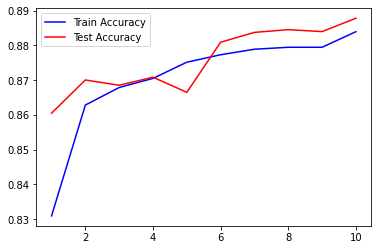

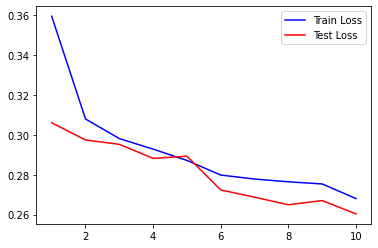

In [ ]:
import matplotlib.pyplot as plt
acc2 = history.history['acc']
val_acc = history.history['val_acc']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,model.predict(X_test).round()))

553/553 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      8689
         1.0       0.93      0.84      0.88      8984

    accuracy                           0.89     17673
   macro avg       0.89      0.89      0.89     17673
weighted avg       0.89      0.89      0.89     17673



In [ ]:
confusion_matrix(y_test,model.predict(X_test).round())

553/553 [==============================] - 2s 4ms/step


array([[8119,  570],
       [1413, 7571]])

553/553 [==============================] - 2s 4ms/step


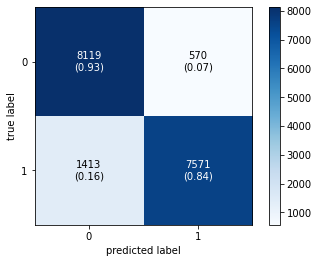

In [ ]:
 #confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,model.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
model = Sequential()


model.add(LSTM(32,input_shape=(16,1),activation='relu',return_sequences = True)) #model.add(LSTM(32,activation='relu'))
model.add(LSTM(64,input_shape=(16,1),activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
531/531 [==============================] - 34s 60ms/step - loss: 0.3651 - acc: 0.8269 - val_loss: 0.2960 - val_acc: 0.8654
Epoch 2/10
531/531 [==============================] - 30s 57ms/step - loss: 0.3019 - acc: 0.8670 - val_loss: 0.2841 - val_acc: 0.8739
Epoch 3/10
531/531 [==============================] - 31s 58ms/step - loss: 0.2917 - acc: 0.8722 - val_loss: 0.2900 - val_acc: 0.8729
Epoch 4/10
531/531 [==============================] - 32s 59ms/step - loss: 0.2819 - acc: 0.8766 - val_loss: 0.2692 - val_acc: 0.8820
Epoch 5/10
531/531 [==============================] - 31s 59ms/step - loss: 0.2783 - acc: 0.8787 - val_loss: 0.2835 - val_acc: 0.8749
Epoch 6/10
531/531 [==============================] - 31s 59ms/step - loss: 0.2749 - acc: 0.8805 - val_loss: 0.2809 - val_acc: 0.8758
Epoch 7/10
531/531 [==============================] - 31s 58ms/step - loss: 0.2708 - acc: 0.8837 - val_loss: 0.2564 - val_acc: 0.8913
Epoch 8/10
531/531 [==============================] - 32s 60ms

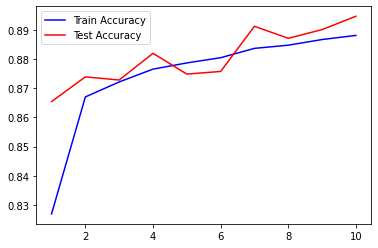

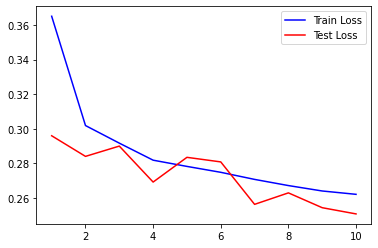

In [ ]:
import matplotlib.pyplot as plt
acc2 = history.history['acc']
val_acc = history.history['val_acc']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,model.predict(X_test).round()))

553/553 [==============================] - 3s 6ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      8689
         1.0       0.96      0.83      0.89      8984

    accuracy                           0.89     17673
   macro avg       0.90      0.90      0.89     17673
weighted avg       0.90      0.89      0.89     17673



In [ ]:
confusion_matrix(y_test,model.predict(X_test).round())

553/553 [==============================] - 3s 6ms/step


array([[8394,  295],
       [1565, 7419]])

553/553 [==============================] - 3s 6ms/step


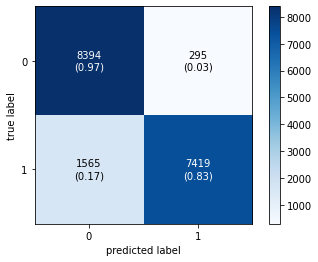

In [ ]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,model.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Tune the batch size and epoch

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
def create_model():
model = Sequential()

model.add(SimpleRNN(64,activation='relu',return_sequences = True)) #model.add(LSTM(32,activation='relu'))
model.add(SimpleRNN(64,return_sequences = True))

model.add(SimpleRNN(64))
model.add(Dense(1,activation='sigmoid'))

  #Step 3: Compile Model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
  return model

In [ ]:
# create model
model = KerasClassifier(model=create_model, verbose=1)

# define the grid search parameters
batch_size = [100, 150, 200, 250]
epochs = [15, 20, 25, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/30
354/354 [==============================] - 13s 31ms/step - loss: 0.3091 - acc: 0.8643
Epoch 2/30
354/354 [==============================] - 12s 33ms/step - loss: 0.2924 - acc: 0.8740
Epoch 3/30
354/354 [==============================] - 11s 32ms/step - loss: 0.2808 - acc: 0.8802
Epoch 4/30
354/354 [==============================] - 11s 31ms/step - loss: 0.2758 - acc: 0.8832
Epoch 5/30
354/354 [==============================] - 11s 31ms/step - loss: 0.2723 - acc: 0.8840
Epoch 6/30
354/354 [==============================] - 11s 32ms/step - loss: 0.2675 - acc: 0.8861
Epoch 7/30
354/354 [==============================] - 11s 31ms/step - loss: 0.2678 - acc: 0.8859
Epoch 8/30
354/354 [==============================] - 11s 31ms/step - loss: 0.2657 - acc: 0.8864
Epoch 9/30
354/354 [==============================] - 9s 26ms/step - loss: 0.2646 - acc: 0.8879
Epoch 10/30
354/354 [==============================] - 11s 30ms/step - loss: 0.2603 - acc: 0.8892
Epoch 11/30
354/354 [=========

In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(grid_result.cv_results_['params'])
mean_test_score = pd.DataFrame(grid_result.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['batch_size','epochs','mean_test_score']
#print(combination_table)
combination_table.sort_values(by=['mean_test_score'],ascending=False)

In [ ]:
# Summarize result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.897848 using {'batch_size': 150, 'epochs': 30}
0.885890 (0.001454) with {'batch_size': 100, 'epochs': 15}
0.891303 (0.002515) with {'batch_size': 100, 'epochs': 20}
0.895622 (0.002001) with {'batch_size': 100, 'epochs': 25}
0.895132 (0.001895) with {'batch_size': 100, 'epochs': 30}
0.890869 (0.002174) with {'batch_size': 150, 'epochs': 15}
0.893472 (0.004139) with {'batch_size': 150, 'epochs': 20}
0.895207 (0.003586) with {'batch_size': 150, 'epochs': 25}
0.897848 (0.000511) with {'batch_size': 150, 'epochs': 30}
0.889191 (0.005304) with {'batch_size': 200, 'epochs': 15}
0.893491 (0.003186) with {'batch_size': 200, 'epochs': 20}
0.888719 (0.004925) with {'batch_size': 200, 'epochs': 25}
0.893623 (0.004479) with {'batch_size': 200, 'epochs': 30}
0.885400 (0.006672) with {'batch_size': 250, 'epochs': 15}
0.889455 (0.003165) with {'batch_size': 250, 'epochs': 20}
0.891775 (0.005697) with {'batch_size': 250, 'epochs': 25}
0.885852 (0.012871) with {'batch_size': 250, 'epochs': 30}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,grid_result.best_estimator_.predict(X_test).round()))

118/118 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91      8689
         1.0       0.98      0.82      0.89      8984

    accuracy                           0.90     17673
   macro avg       0.91      0.90      0.90     17673
weighted avg       0.91      0.90      0.90     17673



In [ ]:
confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())

118/118 [==============================] - 1s 11ms/step


array([[8525,  164],
       [1589, 7395]])

118/118 [==============================] - 1s 11ms/step


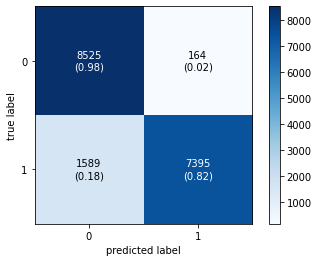

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Tune the Training Optimization Algorithm

In [ ]:
# create model
model2 = KerasClassifier(model=create_model2, loss='binary_crossentropy', epochs=25, batch_size=150, verbose=1)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(grid_result.cv_results_['params'])
mean_test_score = pd.DataFrame(grid_result.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['params','mean_test_score']
#print(combination_table)
combination_table.sort_values(by=['mean_test_score'],ascending=False)

params  mean_test_score
5    Adamax         0.895943
4      Adam         0.895415
3  Adadelta         0.893114
2   Adagrad         0.891567
1   RMSprop         0.889078
6     Nadam         0.888191
0       SGD         0.885098

In [ ]:
# summaraize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.895943 using {'optimizer': 'Adamax'}
0.885098 (0.000254) with {'optimizer': 'SGD'}
0.889078 (0.001147) with {'optimizer': 'RMSprop'}
0.891567 (0.000807) with {'optimizer': 'Adagrad'}
0.893114 (0.007237) with {'optimizer': 'Adadelta'}
0.895415 (0.002785) with {'optimizer': 'Adam'}
0.895943 (0.003816) with {'optimizer': 'Adamax'}
0.888191 (0.001731) with {'optimizer': 'Nadam'}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,grid_result.best_estimator_.predict(X_test).round()))

118/118 [==============================] - 2s 10ms/step
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      8689
         1.0       0.97      0.83      0.89      8984

    accuracy                           0.90     17673
   macro avg       0.91      0.90      0.90     17673
weighted avg       0.91      0.90      0.90     17673



In [ ]:
confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())

118/118 [==============================] - 1s 10ms/step


array([[8422,  267],
       [1501, 7483]])

118/118 [==============================] - 1s 10ms/step


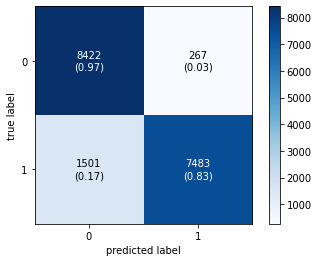

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Tune the Neuron Activation Function

In [ ]:
# Function to create model, required for KerasClassifier

def create_model(activation = 'relu'):

  # create model
  model = Sequential()

  model.add(SimpleRNN(64,activation='relu',input_shape=(16,1),return_sequences = True))
  model.add(SimpleRNN(64,activation='relu',return_sequences = True))
  model.add(SimpleRNN(64,activation='relu'))
  model.add(Dense(46,activation='relu'))

  model.add(Dense(1,activation='sigmoid'))



  # Compile model

  model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])

  return model

In [ ]:
model = KerasClassifier(model=create_model, epochs=30, batch_size=150, verbose=0)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

param_grid = dict(model__activation=activation)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

In [ ]:
# summaraize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.895415 using {'model__activation': 'softplus'}
0.889040 (0.004885) with {'model__activation': 'softmax'}
0.895415 (0.001500) with {'model__activation': 'softplus'}
0.892718 (0.005809) with {'model__activation': 'softsign'}
0.891718 (0.002061) with {'model__activation': 'relu'}
0.894981 (0.002321) with {'model__activation': 'tanh'}
0.893661 (0.000829) with {'model__activation': 'sigmoid'}
0.891039 (0.002027) with {'model__activation': 'hard_sigmoid'}
0.893548 (0.001296) with {'model__activation': 'linear'}


In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(grid_result.cv_results_['params'])
mean_test_score = pd.DataFrame(grid_result.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['model__activation','mean_test_score']
#print(combination_table)
combination_table.sort_values(by=['mean_test_score'],ascending=False)

model__activation  mean_test_score
1          softplus         0.895415
4              tanh         0.894981
5           sigmoid         0.893661
7            linear         0.893548
2          softsign         0.892718
3              relu         0.891718
6      hard_sigmoid         0.891039
0           softmax         0.889040

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,grid_result.best_estimator_.predict(X_test).round()))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90      8689
         1.0       0.96      0.83      0.89      8984

    accuracy                           0.90     17673
   macro avg       0.90      0.90      0.90     17673
weighted avg       0.91      0.90      0.90     17673



In [ ]:
confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())

array([[8410,  279],
       [1535, 7449]])

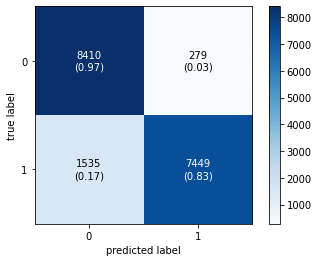

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,grid_result.best_estimator_.predict(X_test).round())
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()